# Exoplanet Exploration
___

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

%matplotlib inline

#### Dataset Load
____

In [55]:
columns = ["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname",
           "koi_period_err1","koi_period_err2","koi_time0bk_err1","koi_time0bk_err2","koi_impact_err1","koi_impact_err2","koi_duration_err1","koi_duration_err2","koi_depth_err1",
           "koi_depth_err2","koi_prad_err1","koi_prad_err2","koi_teq_err1","koi_teq_err2","koi_insol_err1","koi_insol_err2","koi_steff_err1","koi_steff_err2","koi_slogg_err1",
           "koi_slogg_err2","koi_srad_err1","koi_srad_err2"]

planets = pd.read_csv('dataset/cumulative.csv').drop(columns, axis=1)
planets.head(5)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [56]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 21 columns):
koi_disposition     9564 non-null object
koi_fpflag_nt       9564 non-null int64
koi_fpflag_ss       9564 non-null int64
koi_fpflag_co       9564 non-null int64
koi_fpflag_ec       9564 non-null int64
koi_period          9564 non-null float64
koi_time0bk         9564 non-null float64
koi_impact          9201 non-null float64
koi_duration        9564 non-null float64
koi_depth           9201 non-null float64
koi_prad            9201 non-null float64
koi_teq             9201 non-null float64
koi_insol           9243 non-null float64
koi_model_snr       9201 non-null float64
koi_tce_plnt_num    9218 non-null float64
koi_steff           9201 non-null float64
koi_slogg           9201 non-null float64
koi_srad            9201 non-null float64
ra                  9564 non-null float64
dec                 9564 non-null float64
koi_kepmag          9563 non-null float64
dtypes: float64(16),

In [57]:
planets.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
mean,0.188206,0.231598,0.194898,0.120033,75.671358,166.183251,0.735105,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,0.390897,0.421875,0.396143,0.325018,1334.744046,67.918960,3.348832,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.197000,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.889000,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000
max,1.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


#### Exploratory Data Analysis
____

Using a simple heapmap to see where are missing data.

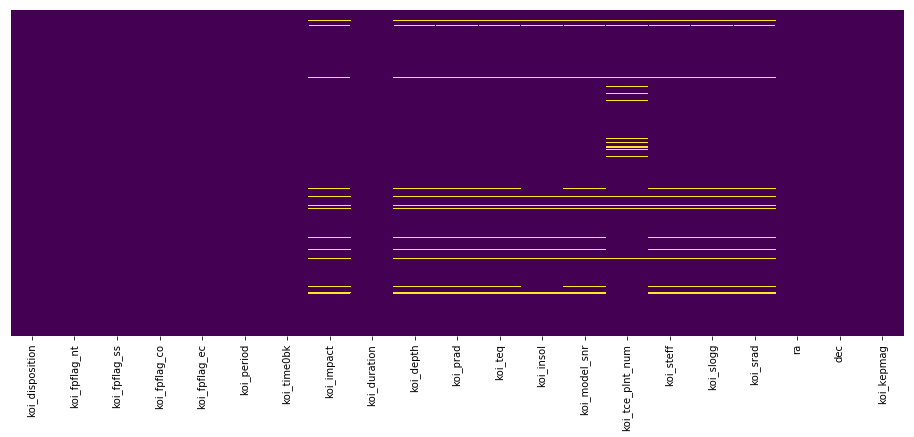

In [58]:
plt.figure(figsize=(16,6))

sns.heatmap(planets.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

+ We could use a mean strategy for update the NaN record but since I am not familiar with this data, I prefer to remove the records as well.

In [59]:
planets.dropna(axis='columns', how='all', inplace=True)
planets.dropna(inplace=True)
planets.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


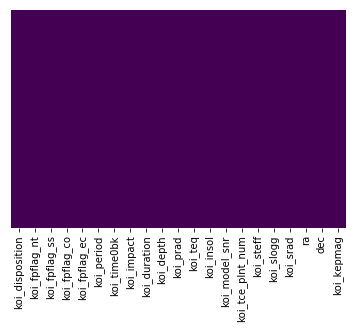

In [60]:
sns.heatmap(planets.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

**Explore the correlation across the entire data set.**

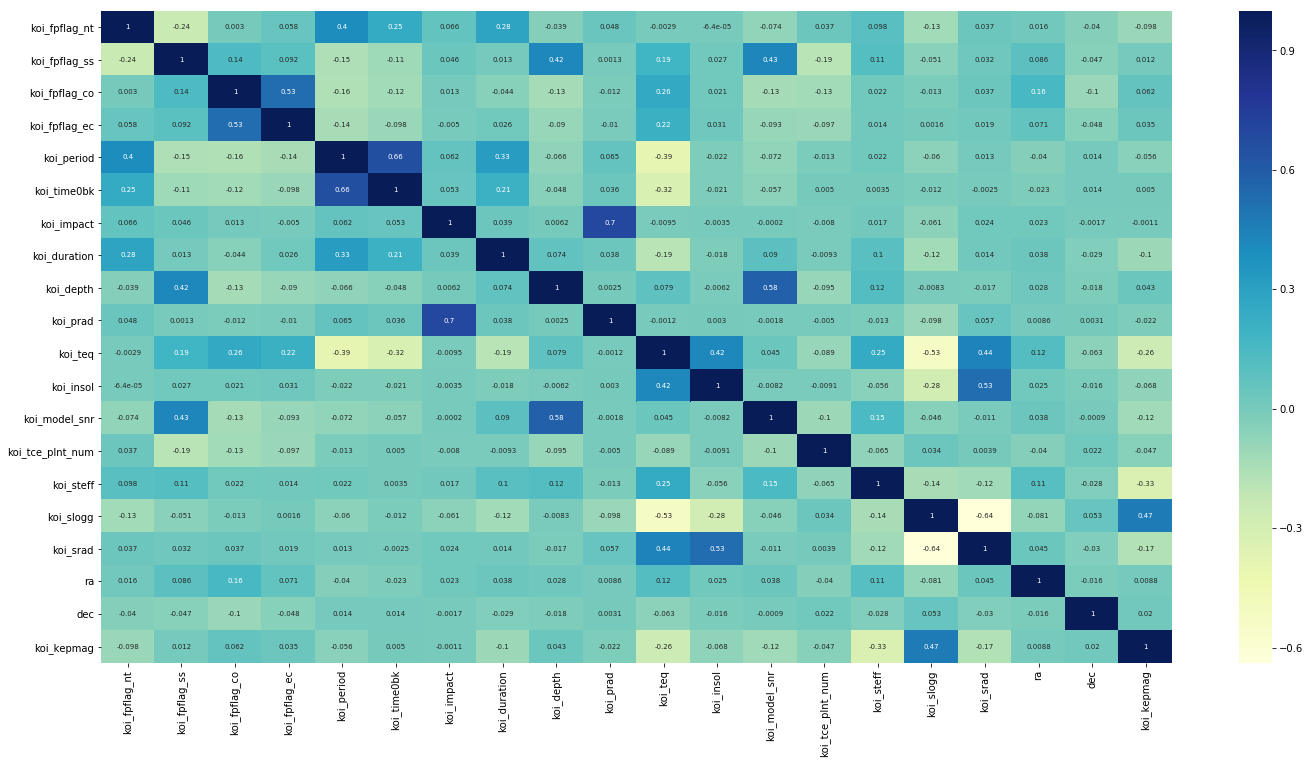

In [61]:
plt.figure(figsize=(24,12))

sns.heatmap(planets.corr(), annot=True, annot_kws={"size": 7}, cmap='YlGnBu')
plt.show()

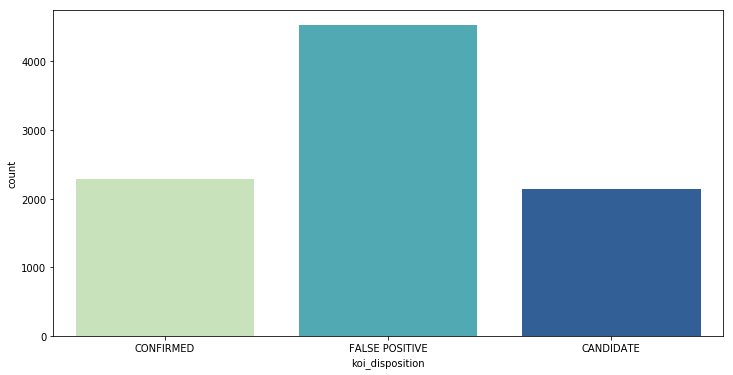

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x='koi_disposition', data=planets, palette='YlGnBu')
plt.show()

### Standardize the Variables
____

In [64]:
scaler =  MinMaxScaler()
scaler.fit(planets.drop('koi_disposition',axis=1))
scaled_features = scaler.transform(planets.drop('koi_disposition',axis=1))

planets_scaled = pd.DataFrame(scaled_features,columns=planets.columns[1:])
planets_scaled.head(5)

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0.0,0.0,0.0,0.0,0.008617,0.036999,0.001448,0.020980,0.000400,0.000011,0.048096,8.547114e-06,0.003954,0.000000,0.211107,0.831296,0.003560,0.552473,0.733837,0.642863
1,0.0,0.0,0.0,0.0,0.050570,0.031063,0.005813,0.032169,0.000568,0.000014,0.024082,8.303224e-07,0.002849,0.142857,0.211107,0.831296,0.003560,0.552473,0.733837,0.642863
2,0.0,1.0,0.0,0.0,0.018338,0.040928,0.009613,0.012494,0.007025,0.000072,0.037461,3.588016e-06,0.008427,0.000000,0.241179,0.845778,0.003303,0.784346,0.733360,0.649689
3,0.0,1.0,0.0,0.0,0.001379,0.036828,0.012658,0.017001,0.005241,0.000167,0.089400,8.147390e-05,0.055838,0.000000,0.237552,0.849539,0.002968,0.259826,0.742947,0.662039
4,0.0,0.0,0.0,0.0,0.002116,0.037781,0.006954,0.011571,0.000391,0.000013,0.090154,8.459789e-05,0.004517,0.000000,0.254628,0.825842,0.004077,0.407085,0.739203,0.655289


### Encoding categorical data
____

### Train Test Split
____

In [65]:
X = planets_scaled
y = planets['koi_disposition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Train a Model
##### Support Vector Machine
____

In [66]:
model = SVC(kernel='rbf')

model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Model Evaluation
____

In [67]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[ 213  405   12]
 [  97  577   11]
 [   1    0 1368]]


In [68]:
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.68      0.34      0.45       630
     CONFIRMED       0.59      0.84      0.69       685
FALSE POSITIVE       0.98      1.00      0.99      1369

   avg / total       0.81      0.80      0.79      2684



In [69]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.7974764414630251
Testing Data Score: 0.8040238450074516


### GridSearch Practice
____

In [70]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.7921455938697318, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.8001916626736943, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.7885906040268457, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7538314176245211, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7498802108289411, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ......... C=0.1, gamma=0.1, score=0.75071907957814, total=   0.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5038314176245211, total=   0.9s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5040728318160038, total=   0.9s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.5038350910834132, total=   0.9s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

#### Best Parameters
____

In [71]:
grid.best_params_

{'C': 100, 'gamma': 1}

In [72]:
grid.best_score_

0.8260661236224245

In [73]:
grid_predictions = grid.predict(X_test)

In [74]:
print(confusion_matrix(y_test,grid_predictions))

[[ 360  258   12]
 [ 172  504    9]
 [   2    2 1365]]


In [75]:
print(classification_report(y_test,grid_predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.67      0.57      0.62       630
     CONFIRMED       0.66      0.74      0.70       685
FALSE POSITIVE       0.98      1.00      0.99      1369

   avg / total       0.83      0.83      0.83      2684



### Train a Model
##### Random Forest
____

In [76]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
rfc_pred = rfc.predict(X_test)

In [78]:
print(confusion_matrix(y_test,rfc_pred))

[[ 467  147   16]
 [ 102  573   10]
 [   1    0 1368]]


In [79]:
print(classification_report(y_test,rfc_pred))

                precision    recall  f1-score   support

     CANDIDATE       0.82      0.74      0.78       630
     CONFIRMED       0.80      0.84      0.82       685
FALSE POSITIVE       0.98      1.00      0.99      1369

   avg / total       0.90      0.90      0.90      2684



### Train a Model
##### K Nearest Neighbors
____

In [80]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0,0.5,'Error Rate')

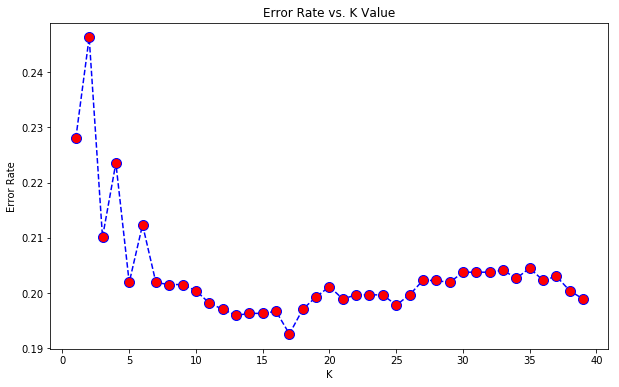

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [82]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 291  327   12]
 [ 166  508   11]
 [   1    0 1368]]
                precision    recall  f1-score   support

     CANDIDATE       0.64      0.46      0.53       630
     CONFIRMED       0.61      0.74      0.67       685
FALSE POSITIVE       0.98      1.00      0.99      1369

   avg / total       0.81      0.81      0.80      2684

